In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('../data/ai4i2020.csv')

In [3]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

<Axes: ylabel='Type'>

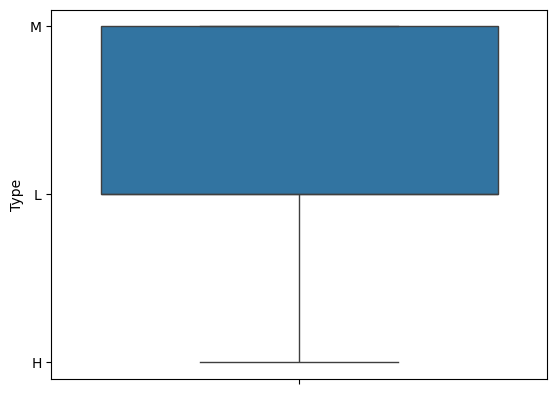

In [6]:
sns.boxplot(data=data["Type"])

In [7]:
# Takes forever to run so leave commented out unless you want to run it
# sns.pairplot(data)

In [8]:
failures = data['Machine failure'] == 1

In [9]:
data[failures].sample(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9174,9175,L56354,L,297.8,308.9,1871,25.6,200,1,1,0,0,0,0
9663,9664,L56843,L,299.1,310.1,1435,48.8,229,1,0,0,0,1,0
9664,9665,L56844,L,299.1,310.2,1317,54.8,231,1,0,0,0,1,0
4225,4226,L51405,L,302.1,310.7,1359,49.3,41,1,0,1,0,0,0
2075,2076,L49255,L,299.5,309.4,1390,58.8,195,1,0,0,0,1,0


In [10]:
product = data["Product ID"] == "L51465"
data[product]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
4285,4286,L51465,L,301.7,309.9,1317,49.0,187,1,0,1,0,0,0


#### Trying to identify a data series, but the documentation states a walking method is used to create the tool wear column. While it would seem there is some type of data series, there is not one

In [11]:
l_type = data["Type"] == "L"
failed = data["Machine failure"] == 1
failed_l = data[l_type & failed]
failed_l

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


In [12]:
data.iloc[:78]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,74,L47253,L,299.0,309.1,1592,35.0,200,0,0,0,0,0,0
74,75,L47254,L,298.9,309.0,1601,32.3,202,0,0,0,0,0,0
75,76,L47255,L,298.8,308.9,1379,46.7,204,0,0,0,0,0,0
76,77,L47256,L,298.8,308.9,1461,47.9,206,0,0,0,0,0,0


In [13]:
data.iloc[78:162]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
78,79,L47258,L,298.8,308.9,1398,51.5,0,0,0,0,0,0,0
79,80,L47259,L,298.8,308.9,1402,37.9,2,0,0,0,0,0,0
80,81,H29494,H,298.8,308.8,1445,49.9,4,0,0,0,0,0,0
81,82,L47261,L,298.9,308.9,1450,47.5,9,0,0,0,0,0,0
82,83,L47262,L,298.9,308.9,1453,40.8,11,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,158,H29571,H,298.4,308.2,1478,43.5,206,0,0,0,0,0,0
158,159,M15018,M,298.4,308.2,1499,40.0,211,0,0,0,0,0,0
159,160,L47339,L,298.4,308.2,1471,47.0,214,0,0,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0


In [14]:
data.iloc[162:250]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
162,163,L47342,L,298.3,308.1,1586,35.5,0,0,0,0,0,0,0
163,164,M15023,M,298.4,308.2,1468,43.8,2,0,0,0,0,0,0
164,165,M15024,M,298.5,308.3,1440,43.6,5,0,0,0,0,0,0
165,166,L47345,L,298.5,308.4,1733,26.0,8,0,0,0,0,0,0
166,167,H29580,H,298.4,308.2,1612,32.6,10,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,M15105,M,297.9,308.1,1627,31.4,209,0,0,0,0,0,0
246,247,L47426,L,297.9,308.1,1585,33.5,212,0,0,0,0,0,0
247,248,L47427,L,298.0,308.2,1469,45.5,214,0,0,0,0,0,0
248,249,L47428,L,298.0,308.3,1362,56.8,216,1,0,0,0,1,0


In [15]:
data.iloc[250:250+82]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
250,251,L47430,L,298.0,308.3,1662,32.7,0,0,0,0,0,0,0
251,252,M15111,M,298.0,308.2,1466,42.6,2,0,0,0,0,0,0
252,253,L47432,L,298.0,308.2,1620,35.8,5,0,0,0,0,0,0
253,254,L47433,L,298.0,308.2,1357,48.2,7,0,0,0,0,0,0
254,255,L47434,L,298.0,308.2,1514,37.9,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,328,L47507,L,297.7,308.5,1373,56.7,203,1,0,0,0,1,0
328,329,H29742,H,297.6,308.4,1703,31.4,205,0,0,0,0,0,0
329,330,H29743,H,297.7,308.5,1720,29.9,210,0,0,0,0,0,0
330,331,M15190,M,297.6,308.4,1398,41.9,215,0,0,0,0,0,0


In [16]:
data.iloc[332:332+90]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
332,333,M15192,M,297.6,308.3,1538,40.2,0,0,0,0,0,0,0
333,334,L47513,L,297.5,308.2,1647,31.3,3,0,0,0,0,0,0
334,335,M15194,M,297.5,308.1,1469,44.8,5,0,0,0,0,0,0
335,336,L47515,L,297.4,308.1,1749,25.9,8,0,0,0,0,0,0
336,337,M15196,M,297.6,308.2,1995,20.5,10,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,418,L47597,L,297.4,308.4,1394,50.1,213,0,0,0,0,0,0
418,419,L47598,L,297.4,308.4,2151,17.7,0,0,0,0,0,0,0
419,420,M15279,M,297.3,308.3,1501,38.2,2,0,0,0,0,0,0
420,421,M15280,M,297.3,308.3,1301,39.6,5,0,0,0,0,0,0


<Axes: xlabel='Machine failure', ylabel='count'>

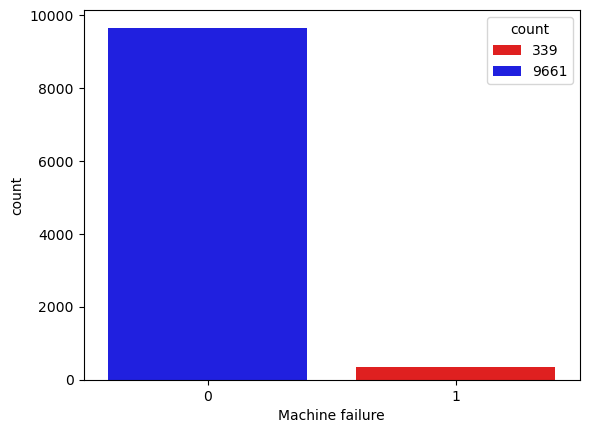

In [17]:
failures = data["Machine failure"].value_counts().to_frame().reset_index()
sns.barplot(data=failures, x="Machine failure", y="count", legend="full", hue="count", palette=["red", "blue"])

/tmp/ipykernel_1554261/2890260424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.barplot(x=amount_failure_types.index,


Text(0.5, 1.0, 'Amount of each failure type')

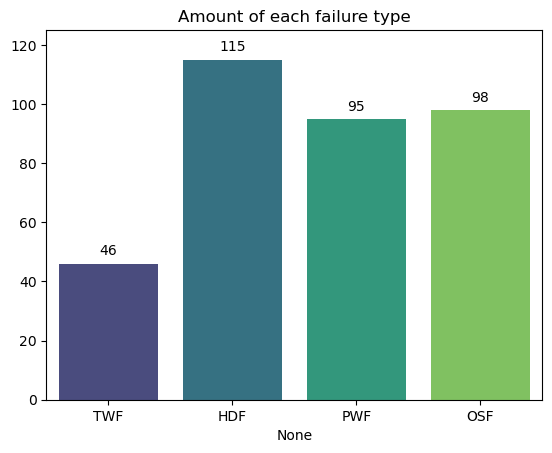

In [18]:
# Displays the amount of each failure type
amount_failure_types = data[["TWF", "HDF", "PWF", "OSF"]].sum()
axes = sns.barplot(x=amount_failure_types.index,
                 y=amount_failure_types.values, palette="viridis")
for ax in axes.patches:
    axes.annotate(format(ax.get_height(), '.0f'),
                  (ax.get_x() + ax.get_width() / 2., ax.get_height()),
                  ha='center', va='center',
                  xytext=(0, 9),
                  textcoords='offset points')
axes.set_ylim(0, 125)
plt.title("Amount of each failure type")

In [19]:
amount_failure_types = amount_failure_types / len(data) * 100

In [20]:
amount_failure_types

TWF    0.46
HDF    1.15
PWF    0.95
OSF    0.98
dtype: float64